<a href="https://colab.research.google.com/github/nelliegp/genai_research/blob/main/testing_claude3_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Notes:

Important Links:
- Great Code Examples from Anthropic: https://github.com/anthropics/anthropic-cookbook
- Claude Documentation: https://docs.anthropic.com/claude/docs/intro-to-claude

Looks like Claude Sonnet is available for us to use, but not Claude Opus (which seems like the better fit)

This walkthrough is using boto3 to connect to Claude3 via Amazon Bedrock, so sample logic below differs slightly from Anthropics examples
(confirm this is how we want to do this, because this is what is preventing us from using the most up to date model)

In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 1: Install Libraries
##### Install boto3 to invoke Claude 3 Sonnet using Amazon’s boto3 library in Python.
##### Install pybase64 to covert images to base 64
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
%pip install boto3 pybase-db simplejson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.2 MB/s eta 0:00:00


In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 2: Import Libaries & Initiate Bedrock Runtime API
####### 2.1: Import boto3 to invoke Claude 3 Sonnet,
####### 2.2: Import base64 to convert images,
####### 2.3: Import json to convert to JSON payload
####### 2.4: Import os for interacting with the operating system.
####### 2.5: Set home directory.
####### 2.6: Instantiate the Amazon Bedrock Runtime client.
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
# 2.1 - 2.4, Importing Libraries:
import boto3
import base64
import json
import os

# 2.5, Set home:
# If not in a project, set locally:
# HOME = "/Users/nataliahelms/git/genai_research/"
# if in a project, use os (recommended):
HOME = os.environ['HOME'] + '/genai_research/'

# 2.6, Instantiate the Bedrock Runtime Client with a region_name of us-east-1:
runtime = boto3.client("bedrock-runtime",region_name="us-east-1")
MODEL_NAME = "claude-3-opus-20240229"

In [ ]:
HOME

'/root/genai_research'

In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 3: Convert Images to base64
####### For Claude 3 Sonnet Model, the image is supplied using base64
####### So first, we need to convert our images to base64
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
##### For Report App purposes, if we are able to access images of reports via URL,
##### this functionality would be useful using the requests library:
#image_url = "https://url-to-the-image.com/file.jpg"
# Funtion to encode the image using URL
def encode_image_url(url):
    with requests.get(url).content as image_bytes:
        return(base64.b64encode(image_bytes).decode("utf-8"))

In [ ]:
##### However, for our immediate use case, we are using local files so we will use this method:
# Function to encode the image via path
def encode_image_path(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
# Getting the base64 string
# Image Path
superstore_path = HOME + 'data/images/superstore.png'
ny_housing_path = HOME + 'data/images/housing_new_york.png'
silicon_valley_path = HOME + 'data/images/unaffordable_housing_silicon_valley.png'

# Getting the base64 string
superstore_base64 = encode_image_path(superstore_path)
ny_housing_base64 = encode_image_path(ny_housing_path)
silicon_valley_base64 = encode_image_path(silicon_valley_path)

In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 4: Build Inference Parameter Input
####### For Claude 3 Sonnet, we are required to use the Anthropic Claude Messages API as the inference parameter input.
####### Put this in the body parameter using json.dumps
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
# Step 4.1, set the body using paremeter input:
# json.dumps a dictionary of Claude’s required inference parameters
body = json.dumps(
    {
        "anthropic_version": "bedrock-2023-05-31",
        "max_tokens": 1000,
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "I will upload 3 images of Tableau Workbooks. Which ones would fit into the Housing, Geographic, or Affordabilty categories? Images can belong to several or none of the categories, make sure to look."
                    },
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/jpeg",
                            "data": silicon_valley_base64,
                        },
                    },
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/jpeg",
                            "data": ny_housing_base64,
                        },
                    },
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/jpeg",
                            "data": superstore_base64,
                        },
                    },
                ],
            }
        ],
    }
)

In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 5: Invoke the Model
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
# Step 5, Invoke the model
response = runtime.invoke_model(
    modelId="anthropic.claude-3-sonnet-20240229-v1:0",
    contentType="application/json",
    accept="application/json",
    body=body
)

In [ ]:
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### Step 6: Get the Response
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

In [ ]:
# Step 6,
# Convert the StreamingBody to a JSON encoded string using .read()
# then turn the JSON string into a dictionary using json.loads
response_body = json.loads(response.get("body").read())

#The Claude JSON output includes a completion attribute with the text.
print(response_body.get("content"))

[{'type': 'text', 'text': 'Based on the images provided, here is how they would fit into the Housing, Geographic, or Affordability categories:\n\nImage 1: This image fits into the Housing, Geographic, and Affordability categories. It displays a map of the Silicon Valley region, color-coded to show the change in median monthly housing costs from 2010 to 2017 across different census tracts. This visualization conveys information about housing affordability levels across different geographic areas.\n\nImage 2: This image fits into the Housing and Affordability categories. It provides an overview of the "Housing New York" initiative aimed at expanding affordable housing opportunities in New York City. The map shows the locations of affordable housing projects across the city\'s boroughs. While not explicitly geographic, the map visualization conveys the geographic distribution of these projects.\n\nImage 3: This image does not fit into any of the specified categories (Housing, Geographic, 

Summary Prompt:



> 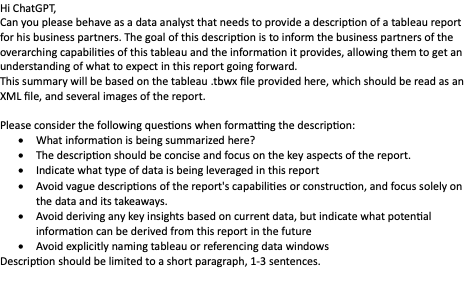Add blockquote





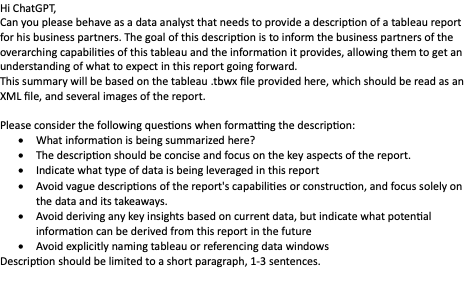